In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import pandas as pd

In [19]:
def Standard_Scaler(data:np.array):
    data = (data-np.mean(data, axis=0))/np.std(data, axis=0)
    return data

In [20]:
def gradient_descent(feature_val: np.array, y_true: np.array, max_iter=1000, learning_rate=0.02):
    numb_rows, numb_col=feature_val.shape
    parameters=np.ones(shape=(numb_col, 1))
    iter_pos=0
    bias=1
    while iter_pos<max_iter:
        y_pred = np.dot(feature_val, parameters)+bias
        error = y_pred-y_true
        gradients=np.dot(error.T, feature_val)
        parameters -= (gradients.T)*(learning_rate/numb_rows)
        bias -= np.sum(error)*(learning_rate/numb_rows)
        y_points.append(cost_func(y_pred=y_pred, y_true=y_true))
        iter_pos+=1
    return( parameters, bias)

In [23]:
def cost_func(y_true: np.array, y_pred: np.array):
    m=y_true.shape[0]
    value = np.sqrt(((np.sum(np.power((y_true-y_pred), 2), axis=0)))/(2*m))
    return value

In [7]:
file_path = '/content/drive/MyDrive/cyberlabs_google_colab/Colab Notebooks/Linear_train.csv'
df=pd.read_csv(file_path)
x_input=df.iloc[:,1:21]
y_true=df[['label']]
mean_xinput = np.atleast_2d(np.mean(x_input, axis=0)).T
std_xinput = np.atleast_2d(np.std(x_input, axis=0)).T
x_points = []
y_points = []


In [8]:
scaled_x_input = Standard_Scaler(x_input)
y_true = np.array(y_true)

In [34]:
parameters, bias=gradient_descent(scaled_x_input, y_true, learning_rate=0.03, max_iter=1000)


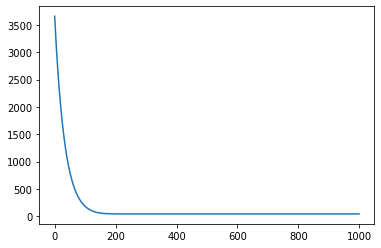

In [11]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(0, len(y_points))], y_points)
plt.show()

In [12]:
print(y_points[-1])
print(cost_func(y_pred=np.dot(scaled_x_input, parameters)+bias, y_true=y_true))


[43.67597348]
[43.67597348]


In [13]:
test_file_path = '/content/drive/MyDrive/cyberlabs_google_colab/Colab Notebooks//Linear_test.csv'
test_df=pd.read_csv(test_file_path)

In [14]:
x_TEST_input = np.array(test_df.iloc[:, 1:21])
x_TEST_input = (x_TEST_input - mean_xinput.T)/(std_xinput.T)

In [15]:
x_test_pred=np.dot(x_TEST_input,parameters)+bias
y_TEST_true = test_df[['label']]

In [16]:
test_cf = cost_func(y_true=y_TEST_true, y_pred=x_test_pred)
print(test_cf)

label    1.589925
dtype: float64
